In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
45 packages can be upgraded. Run 'apt list --upgradable' to see them.
tar: spark-3.2.1-bin-hadoop3.2.tgz: Cannot open: No such file or directory
tar: Error is not recov

In [ ]:
import pyspark
import pyspark.sql.functions as F
import numpy as np
from pyspark.sql import SparkSession
import numpy as np
from datetime import datetime, timedelta
from pyspark.sql.window import Window
import numpy as np
import math
import pandas as pd
import subprocess
from google.colab import drive
import plotly.express as px
import numpy as np
import pandas as pd
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import lag, col, avg, lit


In [ ]:
appName = 'pablo_spr4_<sparksql'
# spark = SparkSession.builder.master("yarn") \
#                     .appName(appName) \
#                     .getOrCreate()
spark = SparkSession.builder\
                    .appName(appName) \
                    .getOrCreate()
sc = spark.sparkContext

In [ ]:
spark

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+---+----------+-------+------+------------------+------------------+------------------+------------------+---------+---------+------------+
|_c0|      Date|    CIK|Symbol|              Open|              High|               Low|             Close|   Volume|Dividends|Stock Splits|
+---+----------+-------+------+------------------+------------------+------------------+------------------+---------+---------+------------+
|  0|2018-01-02|1467373|   ACN|140.06579747904644|140.61329150758854|139.40881021413654|140.37603759765625|3061900.0|      0.0|         0.0|
|  1|2018-01-03|1467373|   ACN|   139.60045780598|141.42541960470635|   139.60045780598|   141.02392578125|2064200.0|      0.0|         0.0|
|  2|2018-01-04|1467373|   ACN| 141.4344978592031|143.13171239044752| 141.2246312125305| 142.6937255859375|1777000.0|      0.0|         0.0|
|  3|2018-01-05|1467373|   ACN|142.90357669666636|143.91643064428482|142.46558993977266| 143.8708038330078|1597600.0|      0.0|         0.0|
|  4|2018-01-

## DATA LOADING

In [ ]:
appName = 'pablo_spr4_<sparksql'
spark = SparkSession.builder.master("yarn") \
                    .appName(appName) \
                    .getOrCreate()
sc = spark.sparkContext
table = spark.table("technology_information.data_orc")

In [ ]:
spark

In [ ]:
dfu.show(5)

+---+----------+-------+------+------------------+------------------+------------------+------------------+---------+---------+------------+
|_c0|      Date|    CIK|Symbol|              Open|              High|               Low|             Close|   Volume|Dividends|Stock Splits|
+---+----------+-------+------+------------------+------------------+------------------+------------------+---------+---------+------------+
|  0|2018-01-02|1467373|   ACN|140.06579747904644|140.61329150758854|139.40881021413654|140.37603759765625|3061900.0|      0.0|         0.0|
|  1|2018-01-03|1467373|   ACN|   139.60045780598|141.42541960470635|   139.60045780598|   141.02392578125|2064200.0|      0.0|         0.0|
|  2|2018-01-04|1467373|   ACN| 141.4344978592031|143.13171239044752| 141.2246312125305| 142.6937255859375|1777000.0|      0.0|         0.0|
|  3|2018-01-05|1467373|   ACN|142.90357669666636|143.91643064428482|142.46558993977266| 143.8708038330078|1597600.0|      0.0|         0.0|
|  4|2018-01-

Preprocessing

In [ ]:
df_salesforce_v0 = dfu.filter(dfu.Symbol == 'CRM')
df_salesforce_vo=df_salesforce_v0.dropna()

In [ ]:
df=df_salesforce_vo.select('Date','CIK','Symbol','Open','High','Low','Close','Volume')

In [ ]:
df.show(5)

+----------+-------+------+------------------+------------------+------------------+------------------+---------+
|      Date|    CIK|Symbol|              Open|              High|               Low|             Close|   Volume|
+----------+-------+------+------------------+------------------+------------------+------------------+---------+
|2018-01-02|1108524|   CRM|102.87999725341797|104.69999694824219| 102.2699966430664|104.41000366210938|4669200.0|
|2018-01-03|1108524|   CRM| 104.9000015258789|106.13999938964844|104.62000274658203|105.29000091552734|3888700.0|
|2018-01-04|1108524|   CRM|             106.0|107.66000366210938| 105.7699966430664|106.68000030517578|4540200.0|
|2018-01-05|1108524|   CRM|107.76000213623047|108.30000305175781|107.19999694824219| 108.0999984741211|3368400.0|
|2018-01-08|1108524|   CRM|             108.0|109.13999938964844|107.56999969482422|108.86000061035156|2933600.0|
+----------+-------+------+------------------+------------------+------------------+----

## LINEAR REGRESSION

In [ ]:
df = df.withColumn("date", col("date").cast("date")) # Asegurarse de que la columna de fecha es de tipo date

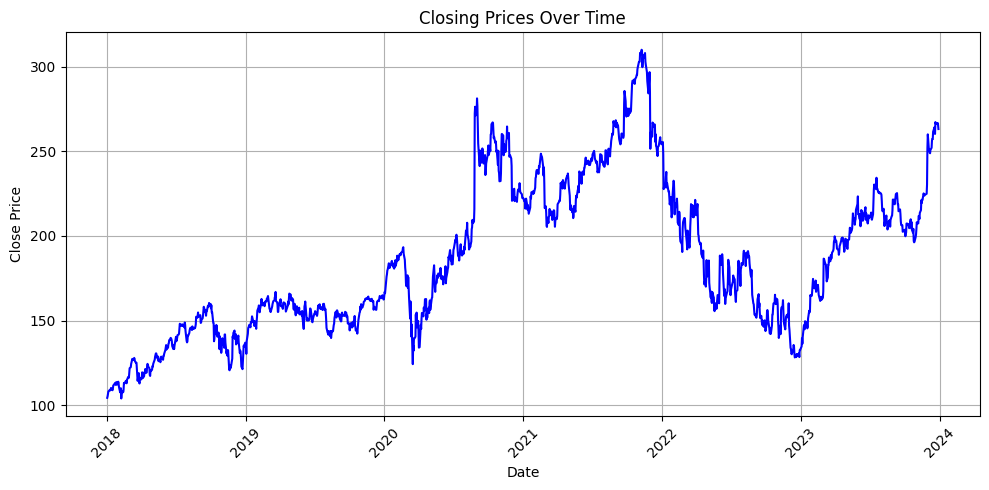

In [ ]:
import matplotlib.pyplot as plt

pandas_df1 = df.toPandas()

# Now you can plot using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(pandas_df1['date'], pandas_df1['Close'], linestyle='-', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



We Define the Model

In [ ]:
# Crear una ventana para calcular el lag
window = Window.orderBy("date").rowsBetween(-4, 0)

# Crear una nueva columna con el promedio de cierre de los últimos 7 días
df = df.withColumn("rolling_close_avg", avg(col("Close")).over(window))

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y validación
train_df = df.where(col("date") <= lit("2023-12-19"))
val_df = df.where((col("date") > lit("2023-12-19")) & (col("date") <= lit("2024-01-01")))

In [ ]:
# Preparar los datos para el modelado
vectorAssembler = VectorAssembler(inputCols=["rolling_close_avg"], outputCol="features")
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")


In [ ]:
lr = LinearRegression(featuresCol="scaledFeatures", labelCol="Close")
pipeline = Pipeline(stages=[vectorAssembler, scaler, lr])

In [ ]:
model = pipeline.fit(train_df)

In [ ]:
predictions = model.transform(val_df)

## Prediction Errors

In [ ]:
evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

evaluator_mae = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="mae")
mae = evaluator_mae.evaluate(predictions)

evaluator_r2 = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE) en el conjunto de validación:", rmse)

Mean Absolute Error (MAE): 1.2326920613210068
R-squared (R2): 0.19959129443109425
Root Mean Squared Error (RMSE) en el conjunto de validación: 1.0371228922683333


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pandas_df = predictions.select("date", "prediction", "close").toPandas()


## Visualizations

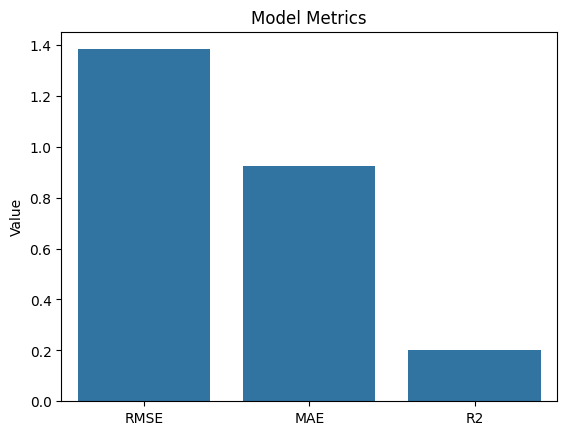

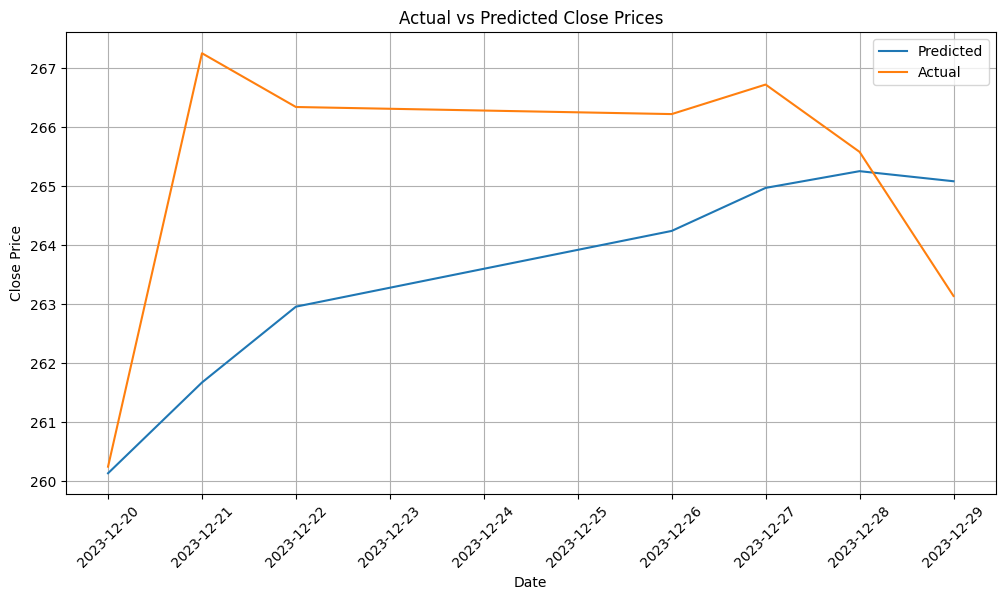

In [ ]:
metrics = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Model Metrics')
plt.ylabel('Value')
plt.show()

# Graficar valores reales vs predicciones
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='prediction', data=pandas_df, label='Predicted')
sns.lineplot(x='date', y='close', data=pandas_df, label='Actual')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
